<a href="https://colab.research.google.com/github/Zaicevvv/GoIT-DSandML-Private/blob/main/HW9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Завантажимо дані.

In [5]:
df_data_2d = pd.read_csv('/content/data_2d.csv')
df_mnist = pd.read_csv('/content/mnist.csv')

df_data_2d.name = 'df_data_2d'
df_mnist.name = 'df_mnist'

df_data_2d

,0.000000000000000000e+00,-7.687164597386728637e-01,4.608603078297135447e-01
0,0.0,2.687848,2.366961
1,0.0,-0.201379,0.470430
2,0.0,0.608496,1.225400
3,0.0,-0.082282,1.137218
4,0.0,2.083069,2.694482
...,...,...,...
194,1.0,0.629144,4.378584
195,1.0,-0.723824,5.361801
196,1.0,1.346107,2.333476
197,1.0,3.608219,3.411546


In [6]:
df_mnist

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
495,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Схоже, що перша колонка у data_2d не є інформативною, перевіримо це

In [10]:
df_data_2d.iloc[:,0].describe()

count    199.000000
mean       0.502513
std        0.501255
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: 0.000000000000000000e+00, dtype: float64

За допомогою бібліотеки yellowbrick та ліктевого методу знайдемо оптимальну кількість кластерів.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

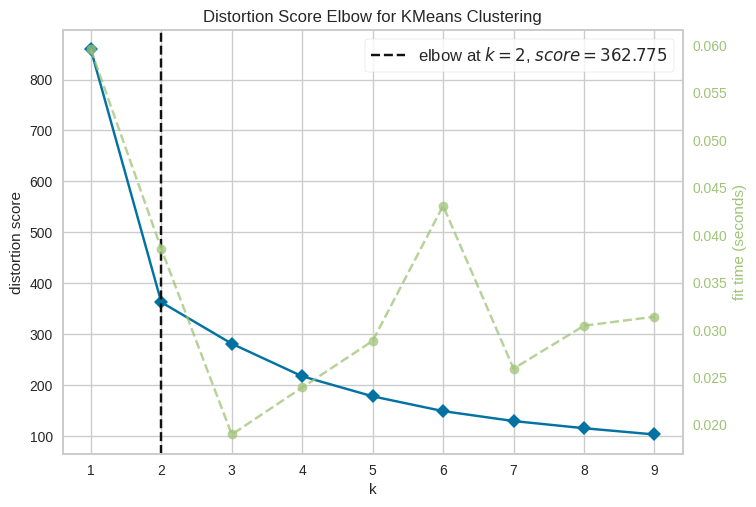

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

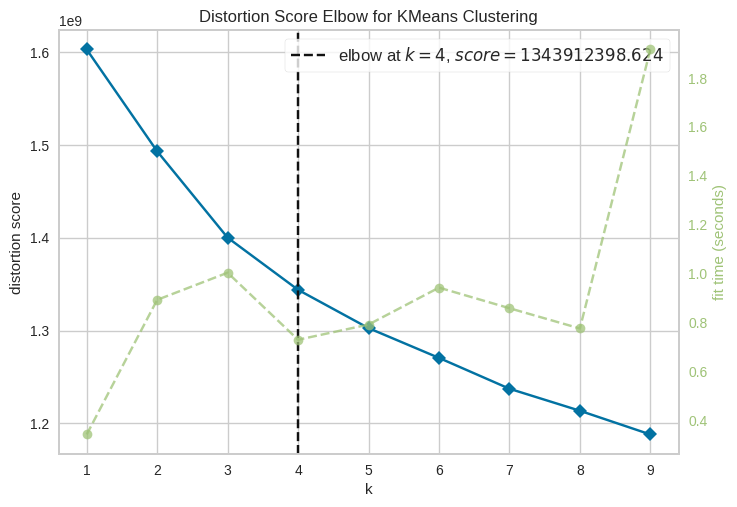

In [11]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

datasets = [df_data_2d, df_mnist]

for dataset in datasets:
  model = KMeans()
  visualizer = KElbowVisualizer(model, k=(1,10))
  visualizer.fit(X=dataset)
  visualizer.show()

Бачимо, що для data_2d оптимальна кількість кластерів - 2, а для mnist - 4.
Використаємо цю знахідку та застосуємо алгоритм K-means для кластеризації.

In [13]:
models = {}
centroids = {}

for dataset, k in zip(datasets, [2, 4]):
  km = KMeans(n_clusters=k).fit(dataset)
  models[dataset.name] = km.predict(dataset)
  centroids[dataset.name] = pd.DataFrame(km.cluster_centers_)

print(models)
centroids

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


{'df_data_2d': array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1], dtype=int32), 'df_mnist': array([1, 2, 3, 0, 2, 0, 0, 0, 0, 3, 3, 0, 3, 2, 1, 0, 0, 1, 0, 2, 1, 0,
       1, 0, 3, 0, 0, 3, 2, 1, 2, 1, 3, 0, 3, 0, 2, 2, 2, 2, 0, 0, 2, 2,
       1, 2, 2, 0, 0, 1, 1, 1, 1, 3, 1, 0, 2, 0, 2, 0, 3, 0, 2, 0, 0, 3,
       0, 1, 3, 0, 3, 3, 2, 2, 2, 1, 0, 2, 0, 0, 3, 3, 0, 0, 0, 2, 1, 3,

{'df_data_2d':           0         1         2
 0  0.062500  1.015728  0.838166
 1  0.912621  2.476077  3.508500,
 'df_mnist':         0    1    2    3    4    5    6    7    8    9    ...           775  \
 0  6.556338  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.781690e+00   
 1  4.956140  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  2.220446e-16   
 2  3.056604  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.110223e-16   
 3  2.380952  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.110223e-16   
 
             776  777  778  779  780  781  782  783  784  
 0  9.014085e-01  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
 1 -1.665335e-16  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
 2 -2.220446e-16  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
 3 -1.110223e-16  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
 
 [4 rows x 785 columns]}

Візуалізуємо результат роботи кластеризації. Скористаємось алгоритмом PCA щоб зменшити розмірність наших даних до 2-вимірного варіанту.

df_data_2d
Before PCA
(199, 3)
After PCA
(199, 2)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


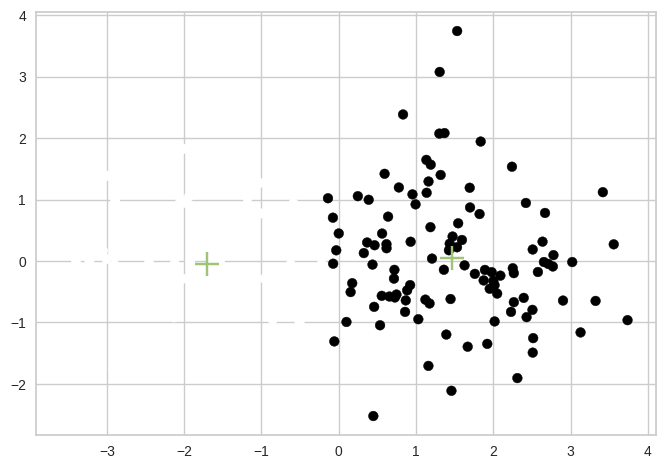

df_mnist
Before PCA
(499, 785)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


After PCA
(499, 4)


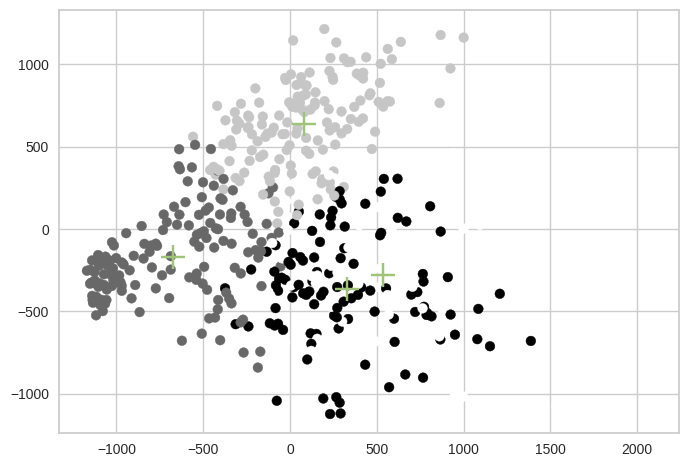

In [14]:
from sklearn.decomposition import PCA

for dataset, k in zip(datasets, [2, 4]):
  print(dataset.name)
  print('Before PCA')
  print(dataset.shape)

  pca = PCA(n_components=k)
  pca.fit(dataset)
  dataset_pca = pd.DataFrame(pca.transform(dataset))
  km = KMeans(n_clusters=k).fit(dataset_pca)
  models[dataset.name] = km.predict(dataset_pca)
  centroids[dataset.name] = pd.DataFrame(km.cluster_centers_)

  print('After PCA')
  print(dataset_pca.shape)

  plt.scatter(dataset_pca.iloc[:,0], dataset_pca.iloc[:,1], c=models[dataset.name])
  plt.scatter(centroids[dataset.name].iloc[:,0], centroids[dataset.name].iloc[:,1], marker="+", c='g', s=300)
  plt.show()